In [1]:
import sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import cross_val_score
from sklearn.svm import LinearSVC
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split
%matplotlib inline

:0: FutureWarning: IPython widgets are experimental and may change in the future.


In [2]:
path = '/home/sadat/Documents/DSE/Data/yogurt.h5'

##Promotions Data (Grocery Store)

Pick 10000 random rows from grocery store data

In [3]:
store = pd.HDFStore(path)
nrows = store.get_storer('groc').nrows
r = np.random.randint(0,nrows,size=10000)
store_df=pd.read_hdf(path,'groc',where=pd.Index(r))
store_df.head()

,IRI_KEY,WEEK,SY,GE,VEND,ITEM,UNITS,DOLLARS,F,D,PR,file,year_int
4716944,250584,1423,88,3,99998,74895,25,10.70,NONE,0,1,yogurt_groc_1374_1426,6
14393351,245677,1575,88,3,99998,16393,32,16.00,NONE,0,0,yogurt_groc_1531_1582,9
9719390,1089353,1457,0,1,70470,655,229,116.15,NONE,0,1,yogurt_groc_1427_1478,7
11719306,275481,1293,0,2,46675,72,12,10.78,NONE,0,1,yogurt_groc_1270_1321,4
10747042,234598,1236,0,1,70470,319,13,7.41,NONE,0,0,yogurt_groc_1218_1269,3


Taking values before 2007 and changing D so that it is 1 if display is used else 0

In [4]:
#Sales before 2007 were stable
store_pre07=store_df[store_df['year_int']<7]

#We dont care about the size of the display and hence setting D=2 to 1.
store_pre07[store_pre07['D']==2] = 1

store_pre07 = store_pre07[['UNITS','DOLLARS','D','PR','SY','GE','VEND','ITEM','IRI_KEY']]

store_pre07.head()

/home/sadat/anaconda3/envs/py2k/lib/python2.7/site-packages/IPython/kernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/sadat/anaconda3/envs/py2k/lib/python2.7/site-packages/pandas/core/indexing.py:461: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,UNITS,DOLLARS,D,PR,SY,GE,VEND,ITEM,IRI_KEY
4716944,25,10.70,0,1,88,3,99998,74895,250584
11719306,12,10.78,0,1,0,2,46675,72,275481
10747042,13,7.41,0,0,0,1,70470,319,234598
1198810,2,4.98,0,0,0,1,36632,906,286851
11056297,2,2.58,0,1,0,1,70470,808,669995


##Products Data

Creating dummies in Products data

In [5]:
prod_path='/home/sadat/Desktop/IRI Yogurt/parsed stub files/prod_yogurt.xls'
df = pd.read_excel(prod_path)

dummies_L1=pd.get_dummies(df['L1'],prefix='L1')
dummies_PROD=pd.get_dummies(df['PRODUCT TYPE'],prefix='PROD')
dummies_FLAV=pd.get_dummies(df['FLAVOR/SCENT'],prefix='FLAV')
dummies_FAT=pd.get_dummies(df['FAT CONTENT'],prefix='FAT')
dummies_CAL=pd.get_dummies(df['CALORIE LEVEL'],prefix='CAL')
dummies_STYLE=pd.get_dummies(df['STYLE'],prefix='STYLE')
dummies_TYPE=pd.get_dummies(df['TYPE OF YOGURT'],prefix='TYPE')
dummies_PACK=pd.get_dummies(df['PACKAGE'],prefix='PACK')
prod = pd.concat([
       dummies_L1, dummies_PROD, dummies_PACK,
        dummies_FLAV, dummies_FAT, dummies_CAL,
        dummies_STYLE, dummies_TYPE, df
    ],axis=1)
prod = prod.drop(labels=['L1','L2','L3','L4','L5','L9','VOL_EQ','PRODUCT TYPE','FLAVOR/SCENT',
          'FAT CONTENT', 'CALORIE LEVEL', 'STYLE', 'TYPE OF YOGURT','VOL_EQ', 'PACKAGE','Level',
          '*STUBSPEC 1284RC                                                         00004  ','UPC'
                        ], axis=1)
prod.head()

,L1_CATEGORY - YOGURT,PROD_ACIDOPHILUS YOGURT,PROD_BUFFALO MILK YOGURT,PROD_CULTURED DAIRY DRINK,PROD_CULTURED SOY DRINK,PROD_CULTURED SOY SMOOTHI,PROD_DAIRY BLEND,PROD_DAIRY SNACK,PROD_GOATMILK YOGURT,PROD_GOATSMILK YOGRT DRNK,...,TYPE_REGULAR,TYPE_REGULAR STIR IN,TYPE_SAUCE ON THE BOTTOM,TYPE_STIR IN,TYPE_SYRUP ON THE BOTTOM,TYPE_WHIPPED,SY,GE,VEND,ITEM
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,7,2,20742,7011
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,3,70452,24101
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,7,3,20742,7013
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,7,2,20742,7012
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0,3,70452,24102


Merge grocery store and products data

In [6]:
prod_store_pre_07=prod.merge(store_pre07, how='inner')
prod_store_pre_07.head()

,L1_CATEGORY - YOGURT,PROD_ACIDOPHILUS YOGURT,PROD_BUFFALO MILK YOGURT,PROD_CULTURED DAIRY DRINK,PROD_CULTURED SOY DRINK,PROD_CULTURED SOY SMOOTHI,PROD_DAIRY BLEND,PROD_DAIRY SNACK,PROD_GOATMILK YOGURT,PROD_GOATSMILK YOGRT DRNK,...,TYPE_WHIPPED,SY,GE,VEND,ITEM,UNITS,DOLLARS,D,PR,IRI_KEY
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,7,1,20742,7004,10,9.90,0,0,287947
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,1,83322,8680,21,20.79,0,0,250381
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,2,21000,820,6,14.34,0,0,293843
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,2,21000,935,7,14.00,0,1,669876
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,1,71043,625,8,5.04,0,0,533862


Calculate per unit price 

In [7]:
prod_store_pre_07['UNIT_PRICE']=prod_store_pre_07['DOLLARS']/prod_store_pre_07['UNITS']
prod_store_pre_07 = prod_store_pre_07.drop(['SY','GE','VEND','ITEM','DOLLARS'],axis=1)
prod_store_pre_07.head()

,L1_CATEGORY - YOGURT,PROD_ACIDOPHILUS YOGURT,PROD_BUFFALO MILK YOGURT,PROD_CULTURED DAIRY DRINK,PROD_CULTURED SOY DRINK,PROD_CULTURED SOY SMOOTHI,PROD_DAIRY BLEND,PROD_DAIRY SNACK,PROD_GOATMILK YOGURT,PROD_GOATSMILK YOGRT DRNK,...,TYPE_REGULAR STIR IN,TYPE_SAUCE ON THE BOTTOM,TYPE_STIR IN,TYPE_SYRUP ON THE BOTTOM,TYPE_WHIPPED,UNITS,D,PR,IRI_KEY,UNIT_PRICE
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,10,0,0,287947,0.99
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,21,0,0,250381,0.99
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,6,0,0,293843,2.39
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,7,0,1,669876,2.00
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,8,0,0,533862,0.63


Set UNITS and UNIT_PRICE so that they are 1 if greater than median, else 0

In [8]:
prod_store_pre_07['UNIT_PRICE']=prod_store_pre_07['UNIT_PRICE'].apply(lambda x:
                                                                      1 if 
                                                                      x>prod_store_pre_07['UNIT_PRICE'].median() 
                                                                      else 0)

prod_store_pre_07['UNITS']=prod_store_pre_07['UNITS'].apply(lambda x:
                                                                1 if 
                                                                x>prod_store_pre_07['UNITS'].median() 
                                                                else 0)

In [9]:
prod_store_pre_07.head()

,L1_CATEGORY - YOGURT,PROD_ACIDOPHILUS YOGURT,PROD_BUFFALO MILK YOGURT,PROD_CULTURED DAIRY DRINK,PROD_CULTURED SOY DRINK,PROD_CULTURED SOY SMOOTHI,PROD_DAIRY BLEND,PROD_DAIRY SNACK,PROD_GOATMILK YOGURT,PROD_GOATSMILK YOGRT DRNK,...,TYPE_REGULAR STIR IN,TYPE_SAUCE ON THE BOTTOM,TYPE_STIR IN,TYPE_SYRUP ON THE BOTTOM,TYPE_WHIPPED,UNITS,D,PR,IRI_KEY,UNIT_PRICE
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,287947,1
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1,0,0,250381,1
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,293843,1
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0,1,669876,1
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,533862,0


Classification

In [10]:
y = prod_store_pre_07['UNITS']
X = prod_store_pre_07.drop(['UNITS','IRI_KEY'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=44)

In [11]:
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.67523510971786838

In [12]:
clf = LinearSVC(C=0.3, penalty='l2', dual=False)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.68965517241379315

##Geographic data

We will pick population data based on geographic location

In [13]:
pop = pd.read_csv('2010_Census_Data.csv')
pop['State'] = pop['State Abbrev']
pop = pop[['State','Population']]
pop.head()

,State,Population
0,AL,4785161
1,AK,714021
2,AZ,6408208
3,AR,2922394
4,CA,37334079


In [14]:
mkt_area = pd.read_csv('Market_Areas_States.csv')
mkt_area.head()

,Market_Area,State
0,BUFFALO/ROCHESTER,NY
1,MILWAUKEE,WI
2,PEORIA/SPRINGFLD.,IL
3,OKLAHOMA CITY,OK
4,LOS ANGELES,CA


In [15]:
mkt = mkt_area.merge(pop, how='inner', on='State')
mkt['Market_Name']=mkt['Market_Area']
mkt = mkt.drop('Market_Area', axis=1)
mkt.head()

,State,Population,Market_Name
0,NY,990643,BUFFALO/ROCHESTER
1,NY,990643,NEW YORK
2,NY,990643,SYRACUSE
3,WI,5690204,MILWAUKEE
4,WI,5690204,GREEN BAY


In [16]:
store = pd.read_hdf(path, key='delivery_stores')
store.head()

,IRI_KEY,OU,EST_ACV,Market_Name,Open,Clsd,yearid,year,name
0,200039,GR,9.602997,BUFFALO/ROCHESTER,539,1219,1,2001,107
1,200171,GR,28.454990,MILWAUKEE,522,9998,1,2001,118
2,200197,GR,11.314990,PEORIA/SPRINGFLD.,903,9998,1,2001,75
3,200233,GR,7.473000,OKLAHOMA CITY,1122,1150,1,2001,123
4,200272,GR,13.266000,LOS ANGELES,873,9998,1,2001,150


In [17]:
mkt_store = mkt.merge(store)
mkt_store.head()

,State,Population,Market_Name,IRI_KEY,OU,EST_ACV,Open,Clsd,yearid,year,name
0,NY,990643,BUFFALO/ROCHESTER,200039,GR,9.602997,539,1219,1,2001,107
1,NY,990643,BUFFALO/ROCHESTER,224496,GR,12.132000,682,9998,1,2001,148
2,NY,990643,BUFFALO/ROCHESTER,226079,GR,18.441990,662,9998,1,2001,148
3,NY,990643,BUFFALO/ROCHESTER,230104,GR,8.657997,587,9998,1,2001,107
4,NY,990643,BUFFALO/ROCHESTER,239927,GR,16.696990,824,9998,1,2001,148


In [18]:
mkt_store = mkt_store[['IRI_KEY','Population']]
mkt_store.drop_duplicates()
mkt_store.head()

,IRI_KEY,Population
0,200039,990643
1,224496,990643
2,226079,990643
3,230104,990643
4,239927,990643


In [19]:
mkt_store.Population = mkt_store.Population.apply(lambda x:1 if x>mkt_store['Population'].median() else 0)
mkt_store.head()

,IRI_KEY,Population
0,200039,0
1,224496,0
2,226079,0
3,230104,0
4,239927,0


Combining population data (for each IRI_KEY) with the model

In [20]:
model = prod_store_pre_07.merge(mkt_store)
model = model.drop('IRI_KEY',axis=1)
model.head()

,L1_CATEGORY - YOGURT,PROD_ACIDOPHILUS YOGURT,PROD_BUFFALO MILK YOGURT,PROD_CULTURED DAIRY DRINK,PROD_CULTURED SOY DRINK,PROD_CULTURED SOY SMOOTHI,PROD_DAIRY BLEND,PROD_DAIRY SNACK,PROD_GOATMILK YOGURT,PROD_GOATSMILK YOGRT DRNK,...,TYPE_REGULAR STIR IN,TYPE_SAUCE ON THE BOTTOM,TYPE_STIR IN,TYPE_SYRUP ON THE BOTTOM,TYPE_WHIPPED,UNITS,D,PR,UNIT_PRICE,Population
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,1,0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,1,0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,1,0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,1,0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,1,0


##Classification

Classification with 33-66 split

In [21]:
y = model['UNITS']
X = model.drop(['UNITS'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=44)

In [22]:
clf = RandomForestClassifier(n_jobs=-1)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.83585540142917192

In [23]:
clf = LinearSVC(C=0.1, penalty='l1', dual=False)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.72922796693288494

10 Fold Cross Validation

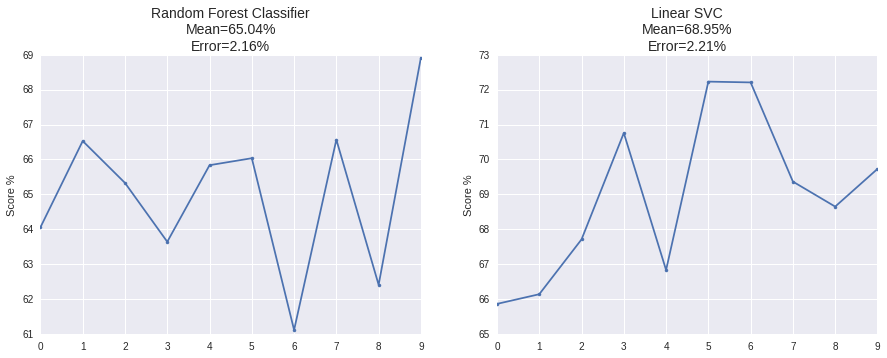

In [30]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
clf = RandomForestClassifier(n_jobs=-1)
scores = cross_val_score(clf,X,y,cv=10,n_jobs=-1)
plt.plot(scores*100,'.-')
plt.ylabel('Score %')
title = 'Random Forest Classifier\nMean=%.2f'%np.mean(scores*100)+'%'+'\nError=%.2f'%np.std(scores*100)+'%'
plt.title(title, fontsize=14);

plt.subplot(1,2,2)
clf = LinearSVC(C=0.1, penalty='l1', dual=False)
scores = cross_val_score(clf,X,y,cv=10,n_jobs=-1)
plt.plot(scores*100,'.-')
plt.ylabel('Score %')
title = 'Linear SVC\nMean=%.2f'%np.mean(scores*100)+'%'+'\nError=%.2f'%np.std(scores*100)+'%'
plt.title(title, fontsize=14);